## Import libraries

In [1]:
# !pip install colabcode

In [2]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D,SimpleRNN, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.models import load_model # type: ignore
from sklearn.preprocessing import LabelEncoder
import cv2
# from google.colab.patches import cv2_imshow

In [3]:
def extractImages(datadir):
    # Get the data
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for images in os.listdir(path):
            img = cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            imagesData.append(img)
            imagesLabel.append(folder)

    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return (imagesData, imagesLabel)

## Loading the data

In [4]:
import urllib.request
import zipfile
import os

# Step 1: Download the ZIP file
url = "https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip"
zip_path = "data.zip"
urllib.request.urlretrieve(url, zip_path)

# Step 2: Extract it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("data")  # Extracts into the "data" folder

print("Download and extraction complete.")


Download and extraction complete.


In [6]:
def download_csv(datadir):
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for image in os.listdir(path):
            img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            img = img.flatten()
            imagesData.append(img)
            imagesLabel.append(folder)

    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return np.array(imagesData), np.array(imagesLabel)

data_dir = 'data/dataset'

imagesData, imagesLabel = download_csv(data_dir)

X = np.array(imagesData)
X = X / 255.0
Y = np.array(imagesLabel)
df_X = pd.DataFrame(X)
df_X['label'] = Y
df_X.to_csv('data.csv', index=False)

In [7]:
import matplotlib.pyplot as plt
import cv2

def cv2_imshow(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

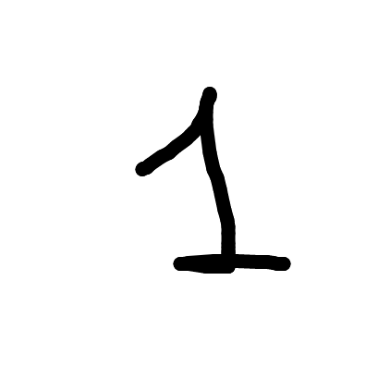

In [8]:
img = cv2.imread('data/data/dataset/1/4uOuiGY6.png') 
cv2_imshow(img)

In [9]:
df=pd.read_csv('data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0.996078,0.996078,1.000000,1.000000,0.172549,0.200000,0.203922,0.047059,1.000000,0.996078,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,y
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,4
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,add
3,0.996078,0.996078,0.996078,1.000000,0.996078,1.000000,0.996078,1.000000,0.996078,0.992157,...,0.203922,0.207843,0.796078,0.788235,0.831373,0.996078,1.0,1.0,1.0,z
4,1.000000,0.996078,1.000000,0.996078,1.000000,0.235294,0.992157,1.000000,1.000000,1.000000,...,1.000000,0.992157,0.992157,0.992157,0.996078,1.000000,1.0,1.0,1.0,y


In [10]:
imagesData = []
imagesLabel = []
data_dir = 'data\dataset'
imagesData, imagesLabel = extractImages(data_dir)
print("Number of images: ",len(imagesData))
print("Labels:",list(set(imagesLabel)))

Number of images:  31506
Labels: ['y', '0', 'div', '=', 'z', 'add', '8', '6', 'sub', '4', '5', 'X', 'mul', '9', '1', '2', '7', '3']


In [11]:
import os

def count_images_in_folder(folder_path):
    valid_image_extensions = {".jpg", ".png"}

    files = os.listdir(folder_path)

    image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in valid_image_extensions)

    return image_count


folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add','sub','mul','div','X','y','z','=']
image_count={}
for i in folders:
  folder_path = 'data/dataset/'+i
  x = count_images_in_folder(folder_path)
  image_count[i] = x
  print(f'Number of images in the folder "{folder_path}": {x}')


Number of images in the folder "data/dataset/0": 595
Number of images in the folder "data/dataset/1": 562
Number of images in the folder "data/dataset/2": 433
Number of images in the folder "data/dataset/3": 541
Number of images in the folder "data/dataset/4": 526
Number of images in the folder "data/dataset/5": 433
Number of images in the folder "data/dataset/6": 581
Number of images in the folder "data/dataset/7": 533
Number of images in the folder "data/dataset/8": 554
Number of images in the folder "data/dataset/9": 546
Number of images in the folder "data/dataset/add": 596
Number of images in the folder "data/dataset/sub": 655
Number of images in the folder "data/dataset/mul": 577
Number of images in the folder "data/dataset/div": 468
Number of images in the folder "data/dataset/X": 6209
Number of images in the folder "data/dataset/y": 9141
Number of images in the folder "data/dataset/z": 5870
Number of images in the folder "data/dataset/=": 2686


In [12]:
print(sum(list(image_count.values())))

31506


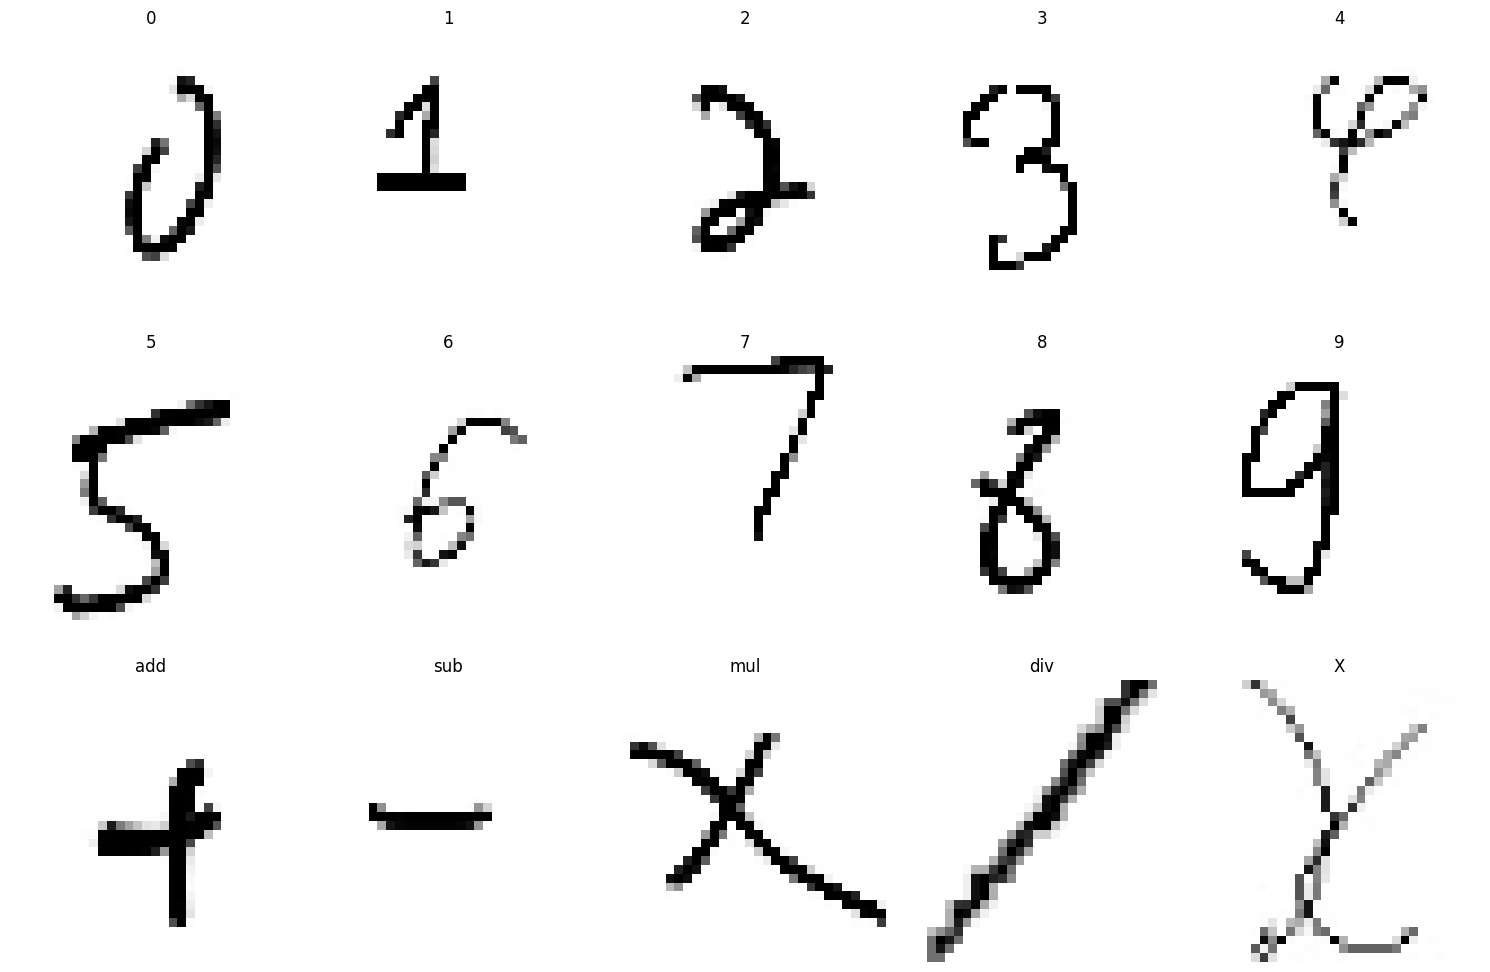

In [14]:
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div','X','y','z','=']
images = []

for folder in folders:
    folder_path = 'data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)



fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"{folders[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

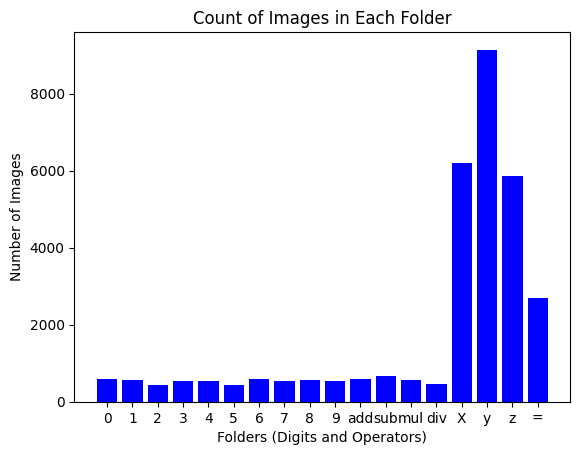

In [15]:
plt.bar(image_count.keys(), image_count.values(), color='blue')
plt.xlabel('Folders (Digits and Operators)')
plt.ylabel('Number of Images')
plt.title('Count of Images in Each Folder')
plt.show()

31506


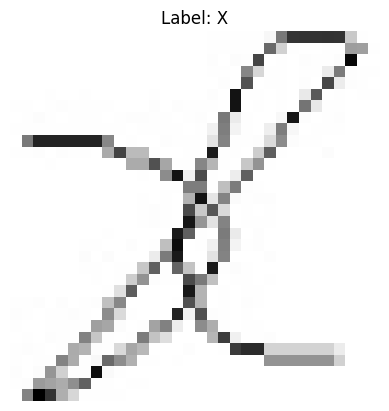

In [16]:
def display_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

print(len(imagesLabel))
x=int(input())
display_image(imagesData[x], imagesLabel[x])

In [17]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(imagesLabel)

In [18]:
label_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
print(label_mapping)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '=', 11: 'X', 12: 'add', 13: 'div', 14: 'mul', 15: 'sub', 16: 'y', 17: 'z'}


In [19]:
X=np.array(imagesData)
Y=np.array(y)
X=X/255.0

In [20]:
X.shape

(31506, 32, 32)

In [21]:
X = np.expand_dims(X, axis=-1)
X.shape

(31506, 32, 32, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 22054
Testing set size: 9452


In [23]:
len(np.unique(y))

18

## CNN Model

In [24]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 1), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(18, activation='softmax'))

cnn_model.summary()


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,794 (436.70 KB)

 Trainable params: 111,794 (436.70 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
cnn_history = cnn_model.fit(X_train, y_train,epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step - acc: 0.4505 - loss: 1.5887 - val_acc: 0.9244 - val_loss: 0.2537
Epoch 2/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - acc: 0.8945 - loss: 0.3242 - val_acc: 0.9628 - val_loss: 0.1187
Epoch 3/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - acc: 0.9365 - loss: 0.1980 - val_acc: 0.9796 - val_loss: 0.0775
Epoch 4/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - acc: 0.9522 - loss: 0.1508 - val_acc: 0.9551 - val_loss: 0.1433
Epoch 5/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - acc: 0.9622 - loss: 0.1200 - val_acc: 0.9860 - val_loss: 0.0447
Epoch 6/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - acc: 0.9668 - loss: 0.0996 - val_acc: 0.9906 - val_loss: 0.0352
Epoch 7/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - acc: 0.9783 - loss: 0.0669 - val_acc: 0.9877 - val_loss: 0.0411
Epoch 8/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 49s 60ms/step - acc: 0.9749 - loss: 0.0718 - val_acc: 0.9880 - val_loss: 0.0388
Epoch 9/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 

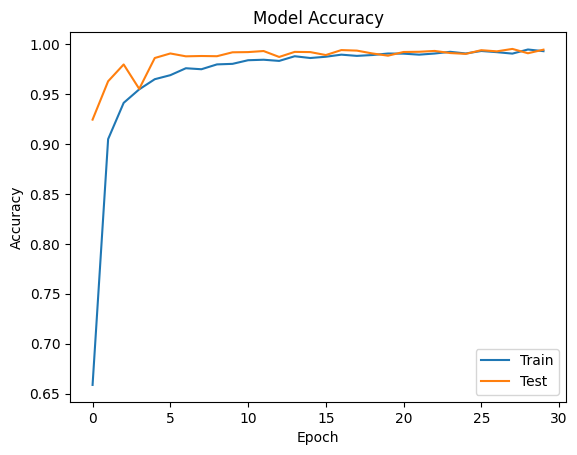

In [26]:
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [27]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test accuracy of the loaded model: {accuracy * 100:.2f}%')

296/296 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - acc: 0.9942 - loss: 0.0345
Test accuracy of the loaded model: 99.44%


In [28]:
loss, accuracy = cnn_model.evaluate(X,y)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

985/985 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - acc: 0.9979 - loss: 0.0120
Accuracy of the model: 99.78%


In [29]:
print(y.shape)

(31506,)


In [30]:
predictions = cnn_model.predict(X)
predictions_flat = np.argmax(predictions, axis=1)

985/985 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step


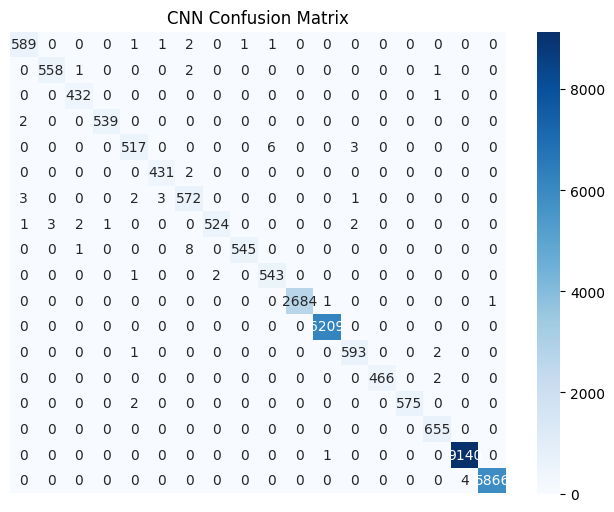

In [31]:
cm = confusion_matrix(y, predictions_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.axis('off')
plt.title("CNN Confusion Matrix")
plt.show()


In [32]:
cm = confusion_matrix(y, predictions_flat)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 589    0    0    0    1    1    2    0    1    1    0    0    0    0
     0    0    0    0]
 [   0  558    1    0    0    0    2    0    0    0    0    0    0    0
     0    1    0    0]
 [   0    0  432    0    0    0    0    0    0    0    0    0    0    0
     0    1    0    0]
 [   2    0    0  539    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0  517    0    0    0    0    6    0    0    3    0
     0    0    0    0]
 [   0    0    0    0    0  431    2    0    0    0    0    0    0    0
     0    0    0    0]
 [   3    0    0    0    2    3  572    0    0    0    0    0    1    0
     0    0    0    0]
 [   1    3    2    1    0    0    0  524    0    0    0    0    2    0
     0    0    0    0]
 [   0    0    1    0    0    0    8    0  545    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    1    0    0    2    0  543    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0 

In [33]:
cnn_model.save('cnn_model.h5')

In [34]:
from tensorflow.keras.models import load_model
cnn_model = load_model('cnn_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


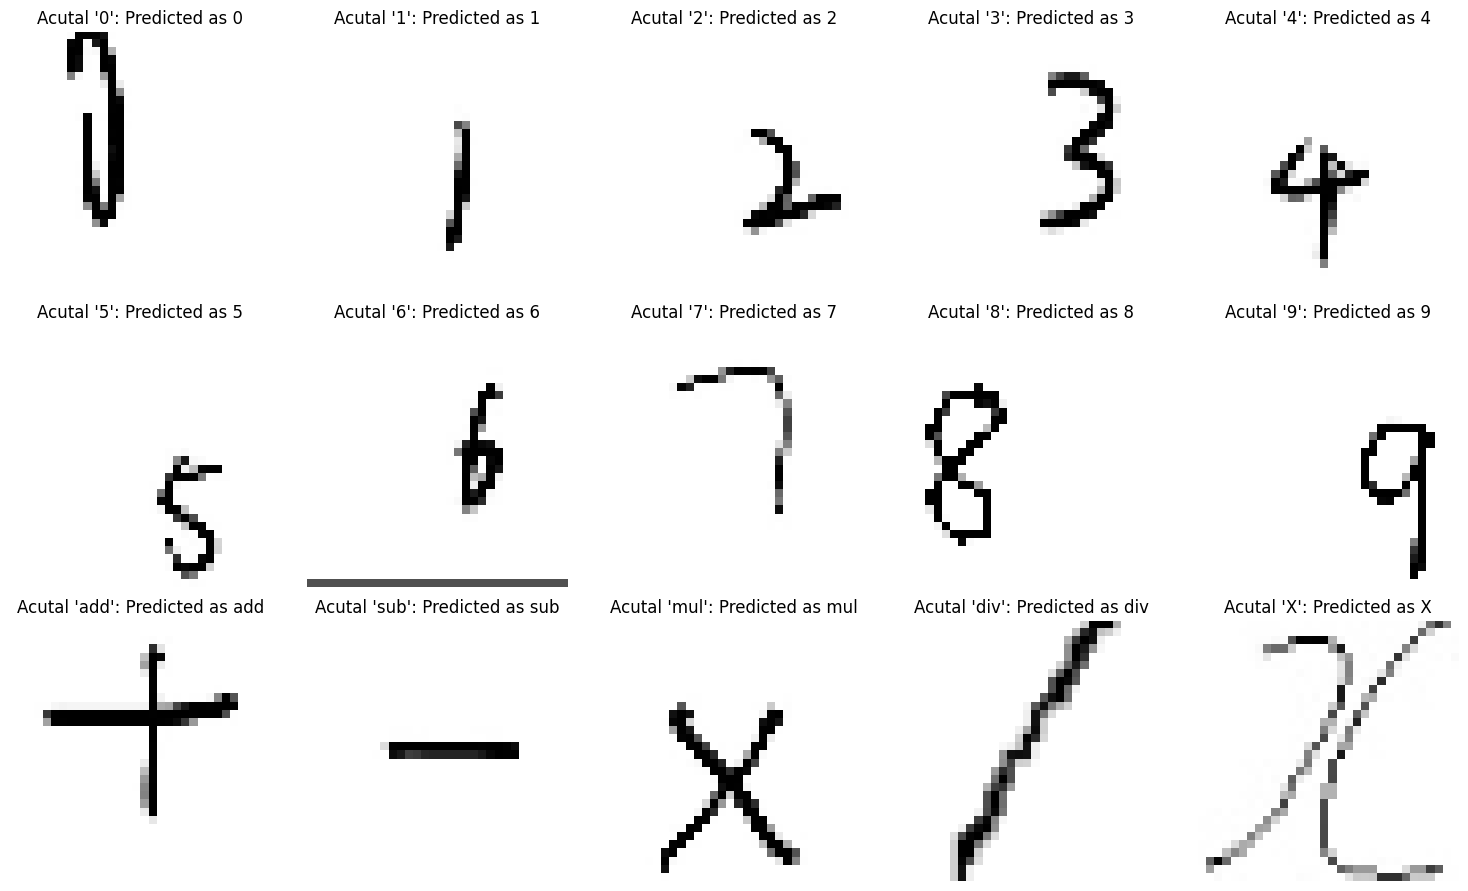

In [35]:
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div',"X",'y','z','=']
images = []

for folder in folders:
    folder_path = 'data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)

predictions = cnn_model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"Acutal '{folders[i]}': Predicted as {label_mapping[predicted_labels[i]]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model  # type: ignore

labels = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '=', 11: 'X', 12: '+', 13: '/', 14: '*', 15: '-', 16: 'y', 17: 'z'}

model = load_model('cnn_model.h5')

def predict(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = [cv2.boundingRect(contour) for contour in contours]
    sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
    sorted_contours = [contours[i] for i in sorted_indices]

    rois = []
    padding = 15

    for contour in sorted_contours:
        x, y, w, h = cv2.boundingRect(contour)
        x_start = max(0, x - padding)
        y_start = max(0, y - padding)
        x_end = min(image.shape[1], x + w + padding)
        y_end = min(image.shape[0], y + h + padding)

        roi = image[y_start:y_end, x_start:x_end]
        roi = cv2.resize(roi, (32, 32))
        rois.append(roi)

    rois = np.array(rois)
    rois = rois / 255.0
    rois = np.expand_dims(rois, axis=-1)

    predictions = model.predict(rois)
    predicted_labels = np.argmax(predictions, axis=1)

    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for i, contour in enumerate(sorted_contours):
        x, y, w, h = cv2.boundingRect(contour)
        label = labels[predicted_labels[i]]
        cv2.rectangle(image_color, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image_color, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    equation = ''.join(labels[predicted_labels[i]] for i in range(len(predicted_labels)))
    print(f'Predicted equation: {equation}')
    print(f'Result: {eval(equation)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


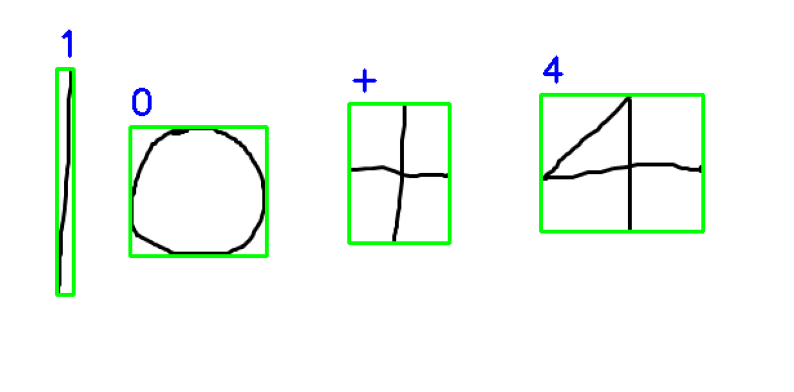

Predicted equation: 10+4
Result: 14


In [44]:
predict('data/test4.png')

## RNN model

In [47]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(32, 32), activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(64, activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(64, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Flatten())
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dense(18, activation='softmax'))

rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 32, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 32, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,362 (130.32 KB)

 Trainable params: 33,362 (130.32 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
rnn_history = rnn_model.fit(X_train, y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 49s 50ms/step - acc: 0.3484 - loss: 1.9579 - val_acc: 0.6429 - val_loss: 1.1775
Epoch 2/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - acc: 0.6262 - loss: 1.1942 - val_acc: 0.6427 - val_loss: 1.2676
Epoch 3/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - acc: 0.6925 - loss: 0.9794 - val_acc: 0.7520 - val_loss: 0.7703
Epoch 4/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - acc: 0.7491 - loss: 0.8019 - val_acc: 0.8070 - val_loss: 0.6063
Epoch 5/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - acc: 0.7605 - loss: 0.7661 - val_acc: 0.7992 - val_loss: 0.6131
Epoch 6/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - acc: 0.8001 - loss: 0.6303 - val_acc: 0.6130 - val_loss: 1.2991
Epoch 7/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - acc: 0.7885 - loss: 0.6928 - val_acc: 0.8417 - val_loss: 0.4751
Epoch 8/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - acc: 0.8122 - loss: 0.5903 - val_acc: 0.8271 - val_loss: 0.5255
Epoch 9/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 

In [49]:
rnn_model.save('rnn_model.h5')

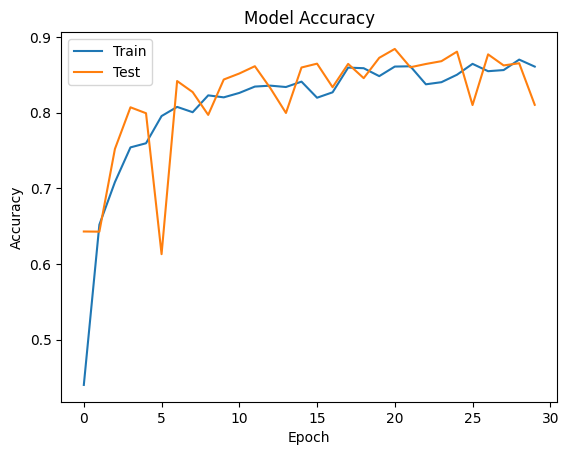

In [50]:
plt.plot(rnn_history.history['acc'])
plt.plot(rnn_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

985/985 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step


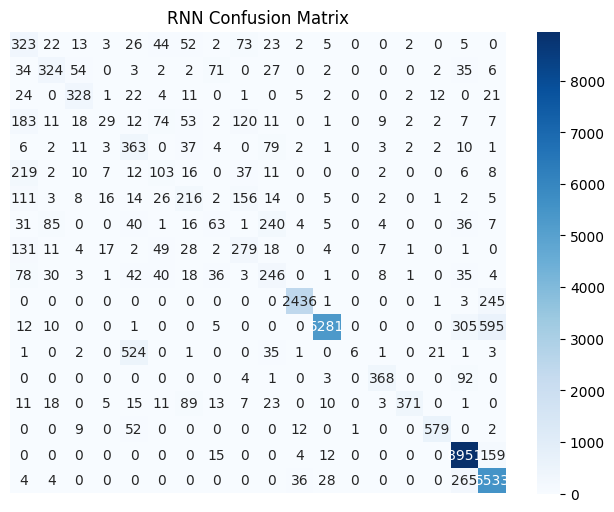

In [51]:
predictions = rnn_model.predict(X)
predictions_flat = np.argmax(predictions, axis=1)
cm = confusion_matrix(y, predictions_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("RNN Confusion Matrix")
plt.axis('off')
plt.show()

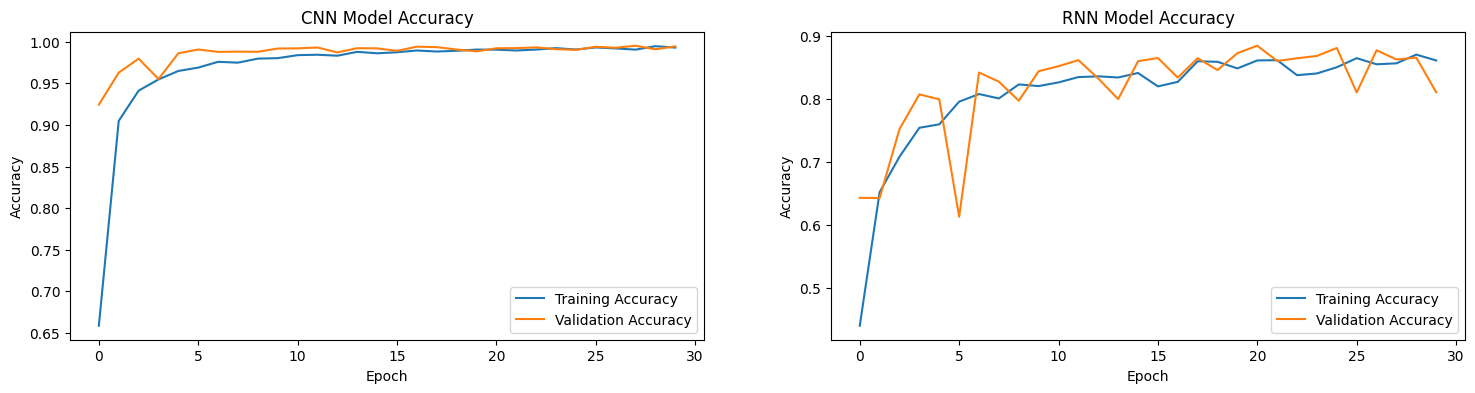

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

axes[0].plot(cnn_history.history['acc'], label='Training Accuracy')
axes[0].plot(cnn_history.history['val_acc'], label='Validation Accuracy')
axes[0].set_title('CNN Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='best')

axes[1].plot(rnn_history.history['acc'], label='Training Accuracy')
axes[1].plot(rnn_history.history['val_acc'], label='Validation Accuracy')
axes[1].set_title('RNN Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best')

plt.show()


## Conclusion

In conclusion, the handwritten equation solver utilizing deep learning techniques, including Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs), has demonstrated promising accuracy levels. The CNN-based approach achieved an impressive accuracy of 99.78%, while the RNN-based method achieved a respectable accuracy of 86.32%.

The CNN model excelled in accurately recognizing and classifying individual handwritten characters within the equations. Its ability to effectively capture spatial hierarchies and local patterns in the input images contributed to its high accuracy. With its deep layers and convolutional operations, the CNN was capable of learning complex features directly from the pixel values, enabling robust classification of handwritten characters.